# Slope Fitting Dev Data

Words, words, words.

In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#
#from slf.fit import *
#from slf.dat import *

from slf.core.db import SLFDB
from slf.core.io import load_pickle

### WORDS

In [3]:
# Get project database object
db = SLFDB()

In [4]:
# Load data readme file
rmd_file = os.path.join(db.data_path, 'EEG', 'MIPDB_PublicFile.csv')
df = pd.read_csv(rmd_file, index_col='ID')

In [5]:
# Check distribution of sexes
print('Number of males: \t', sum(df.Sex == 1))
print('Number of females: \t', sum(df.Sex == 2))

Number of males: 	 69
Number of females: 	 57


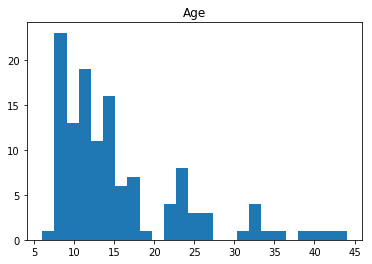

In [6]:
# Age distribution
df.hist('Age', grid=False, bins=25);

### Load subject data

In [7]:
# Check for saved FOOOF files
fres_files = db.check_fooof()

In [8]:
all_dat = [load_pickle(f_name, db.fooof_path) for f_name in fres_files]

In [9]:
# Initialize dataframe to store slope data
sl_df = pd.DataFrame(columns=['ID', 'Age', 'Mean_Sl_EO', 'Median_Sl_EO', 'Mean_Sl_EC', 'Median_Sl_EC'])

# Collect data from all subjects
for dat in all_dat:
    
    sl_dat = {'ID': dat['ID'],
              'Age': df.loc[dat['ID']]['Age'],
              'Mean_Sl_EO': np.mean(dat['sls_eo_avg']),
              'Median_Sl_EO': np.median(dat['sls_eo_avg']),
              'Mean_Sl_EC': np.mean(dat['sls_ec_avg']),
              'Median_Sl_EC': np.median(dat['sls_ec_avg'])}
    
    sl_df = sl_df.append(sl_dat, ignore_index=True)

In [10]:
#
sl_df.head()

,ID,Age,Mean_Sl_EO,Median_Sl_EO,Mean_Sl_EC,Median_Sl_EC
0,A00057092,22.0,1.339244,1.336905,1.286747,1.265742
1,A00057092,22.0,1.339244,1.336905,1.286747,1.265742


In [11]:
#
sl_df.describe()

,Age,Mean_Sl_EO,Median_Sl_EO,Mean_Sl_EC,Median_Sl_EC
count,2.0,2.000000,2.000000,2.000000,2.000000
mean,22.0,1.339244,1.336905,1.286747,1.265742
std,0.0,0.000000,0.000000,0.000000,0.000000
min,22.0,1.339244,1.336905,1.286747,1.265742
25%,22.0,1.339244,1.336905,1.286747,1.265742
50%,22.0,1.339244,1.336905,1.286747,1.265742
75%,22.0,1.339244,1.336905,1.286747,1.265742
max,22.0,1.339244,1.336905,1.286747,1.265742


### Words

In [ ]:
# Check EC Data Slope Vals
plt.figure()
plt.plot(ec_sl_df.Age, ec_sl_df.MeanSl, 'b.')

In [ ]:
# Check EO Data Slope Vals
plt.figure()
plt.plot(eo_sl_df.Age, eo_sl_df.MeanSl, 'r.')

In [ ]:
# Plot EC & EO Data Together
plt.figure()
plt.plot(ec_sl_df.Age, ec_sl_df.MeanSl, 'b.')
plt.plot(eo_sl_df.Age, eo_sl_df.MeanSl, 'r.')

In [ ]:
# Check correlation
from scipy.stats import pearsonr

In [ ]:
# 
print(pearsonr(ec_sl_df.Age, ec_sl_df.MedianSl))
print(pearsonr(eo_sl_df.Age, eo_sl_df.MedianSl))

In [ ]:
#
print('Kids corr')
inds = ec_sl_df.Age < 18
print('\t', pearsonr(ec_sl_df.Age[inds], ec_sl_df.MeanSl[inds]))

#
print('Adults corr')
inds = ec_sl_df.Age > 18
print('\t', pearsonr(ec_sl_df.Age[inds], ec_sl_df.MeanSl[inds]))

In [ ]:
# Plot EC & EO Data Together
plt.figure()
plt.plot(ec_sl_df.MeanSl, eo_sl_df.MeanSl, 'b.')

In [ ]:
# Check mean vs. median
plt.plot(ec_sl_df.MeanSl, ec_sl_df.MedianSl, '.')
plt.plot(eo_sl_df.MeanSl, eo_sl_df.MedianSl, '.')

In [ ]:
# Correlation between EC and EO data
print(pearsonr(eo_sl_df.MedianSl, ec_sl_df.MedianSl))

In [ ]:
# Scatter with colormap mapping to z value
plt.scatter(ec_sl_df.MedianSl, eo_sl_df.MedianSl, c=ec_sl_df.Age)
plt.colorbar()

#### OLD

In [ ]:
# # Get available subject PSD files
# psd_files = db.get_psd_files()

# #
# subjs = [ff.split('_')[0] for ff in psd_files]
# subj_files = [{'ID': subj, 'EC': ec_f, 'EO': eo_f} for subj, ec_f, eo_f in zip(subjs[0::2],
#                                                 [fi for fi in psd_files if 'ec' in fi],
#                                                 [fi for fi in psd_files if 'eo' in fi])]

# # Number of subjects
# print('Number of subjects: ', len(subj_files))

In [ ]:
# # FOOOF - EC - old

# f_range = [3, 35]
# fm = FOOOF(bandwidth_limits=[1, 8], max_n_oscs=6)

# # Eyes Closed Data
# ec_sl_df = pd.DataFrame(columns=['ID', 'Age', 'MeanSl', 'MedianSl'])

# for sf in subj_files:
    
#     freqs, psds, chans = load_psd(os.path.join(db.psd_path, sf['EC']))

#     res = []
#     for psd in psds:
#         fm.fit(freqs, psd, [freqs.min(), freqs.max()])
#         res.append(fm.get_params())
    
#     sls = [fr.background_params[1] for fr in res]

#     sl_dat = {'ID': sf['ID'], 'Age': df.loc[sf['ID']]['Age'],
#               'MeanSl': np.mean(sls), 'MedianSl': np.median(sls)}

#     ec_sl_df = ec_sl_df.append(sl_dat, ignore_index=True)

In [ ]:
# # FOOOF - EO - old
# f_range = [3, 35]
# fm = FOOOF(bandwidth_limits=[1, 8], max_n_oscs=6)

# # Eyes Open Data
# eo_sl_df = pd.DataFrame(columns=['ID', 'Age', 'MeanSl', 'MedianSl'])

# for sf in subj_files:
    
#     freqs, psds, chans = load_psd(os.path.join(db.psd_path, sf['EO']))

#     res = []
#     for psd in psds:
#         fm.fit(freqs, psd, [freqs.min(), freqs.max()])
#         res.append(fm.get_params())
    
#     sls = [fr.background_params[1] for fr in res]

#     sl_dat = {'ID': sf['ID'], 'Age': df.loc[sf['ID']]['Age'],
#               'MeanSl': np.mean(sls), 'MedianSl': np.median(sls)}

#     eo_sl_df = eo_sl_df.append(sl_dat, ignore_index=True)